<a href="https://colab.research.google.com/github/yogisaireddy14/breastCancerPrediction/blob/main/breastCancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Install scikit-plot
!pip install scikit-plot

# Import scikit-plot modules after installation
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
!pip install catboost
!pip show catboost
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.5 MB/s eta 0:00:00
Name: catboost
Version: 1.2.5
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

KeyError: "['Unnamed: 32'] not found in axis"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
import seaborn as sns
sns.pairplot(data=df,hue='Outcome')
plt.show()

KeyError: 'Outcome'

Error in callback <function flush_figures at 0x7c112511c280> (for post_execute):


KeyboardInterrupt: 

In [ ]:
round(df["diagnosis"].value_counts(normalize=True),2)

diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64

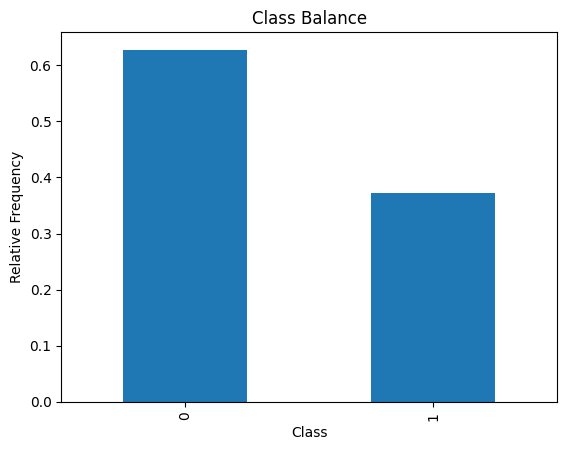

In [ ]:
# Plot class balance
df["diagnosis"].value_counts(normalize=True).plot(kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance")
plt.show()

In [ ]:
target = df['diagnosis']
features = df.drop(columns='diagnosis')

In [ ]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
print(features_scaled)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print(y_test,y_train,X_test,X_train)

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64 68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64 [[0.25978513 0.30064254 0.25775689 ... 0.34879725 0.2856298  0.2129083 ]
 [0.56599934 0.39228948 0.55151683 ... 0.61477663 0.19436231 0.07116621]
 [0.4012968  0.33040243 0.40017967 ... 0.52027491 0.25073921 0.1649613 ]
 ...
 [0.21482323 0.17653027 0.207864   ... 0.33017182 0.2166371  0.1511872 ]
 [0.34260968 0.61345959 0.33694976 ... 0.28243986 0.06406466 0.15033451]
 [0.65071702 0.72404464 0.63513233 ... 0.57010309 0.25684999 0.17801391]] [[0.09692839 0.25769361 0.10365559 ... 0.60137457 0.52493594 0.40968123]
 [0.66775522 0.57017247 0.68350494 ... 0.9975945  0.49931007 0.48117539]
 [0.10374367 0.14034494 0.10648884 ... 0.174811   0.33845851 0.19585465]
 ...
 [0.34592267 0.2404464  0.32140142 ... 0.1145360

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", round(acc_train,2))
print("Test Accuracy:", round(acc_test,2))

Training Accuracy: 0.97
Test Accuracy: 0.98


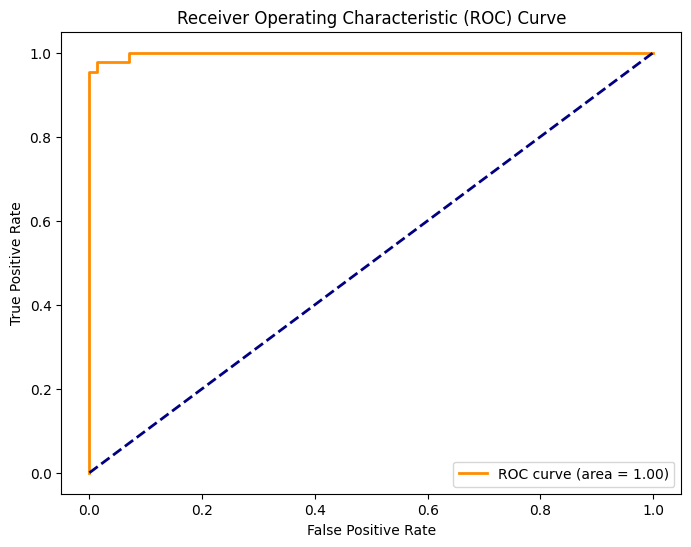

In [ ]:
y_probs = model_lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

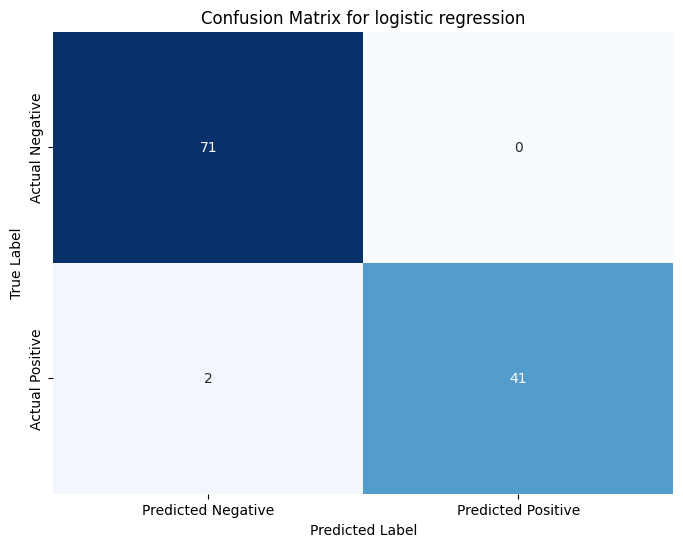

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for logistic regression')
plt.show()


In [ ]:
classification_report_str = classification_report(y_test, y_pred_test)
print("Classification Report:")
print(classification_report_str)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
#knn algorithm
model_knn = KNeighborsClassifier(n_neighbors=2)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

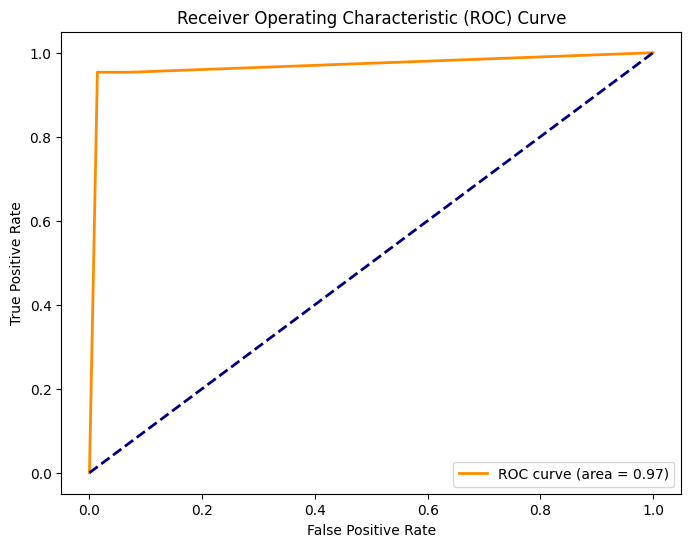

In [ ]:
nan_count = np.count_nonzero(np.isnan(X_test))
y_probs = model_knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

# Convert predicted probabilities to binary labels based on a threshold
y_pred_train_bin_knn = np.where(y_pred_train_knn > 0.5, 1, 0)
y_pred_test_bin_knn = np.where(y_pred_test_knn > 0.5, 1, 0)



In [ ]:
# Evaluate K-Nearest Neighbors model
knn_test_accuracy = accuracy_score(y_test, y_pred_test_knn)

# Print accuracies of all three models
print("K-Nearest Neighbors Test Accuracy:", round(knn_test_accuracy,2))
classification_report_str = classification_report(y_train, y_pred_train_bin_knn)
print("Classification Report:")
print(classification_report_str)

K-Nearest Neighbors Test Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       286
           1       1.00      0.94      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



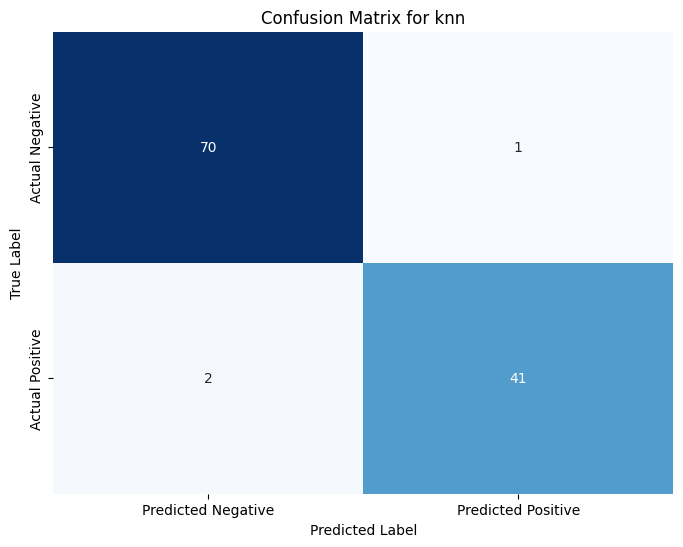

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_test_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for knn')
plt.show()


Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Number of NaN values in X_test: 0


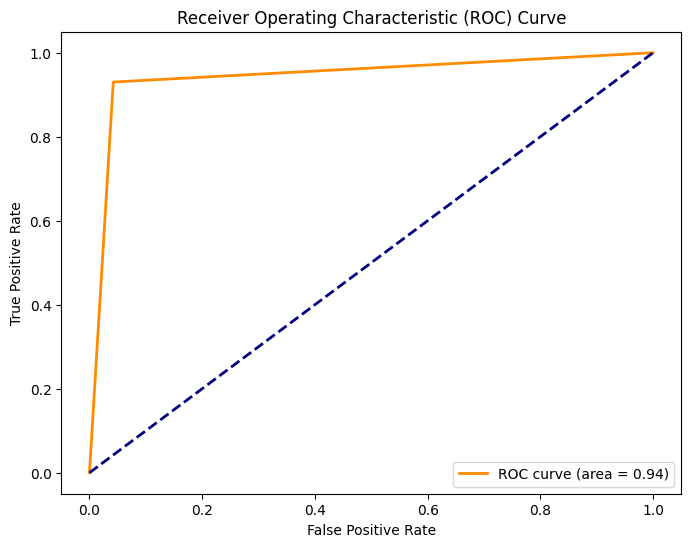

Confusion Matrix(Training Set):
[[68  3]
 [ 3 40]]


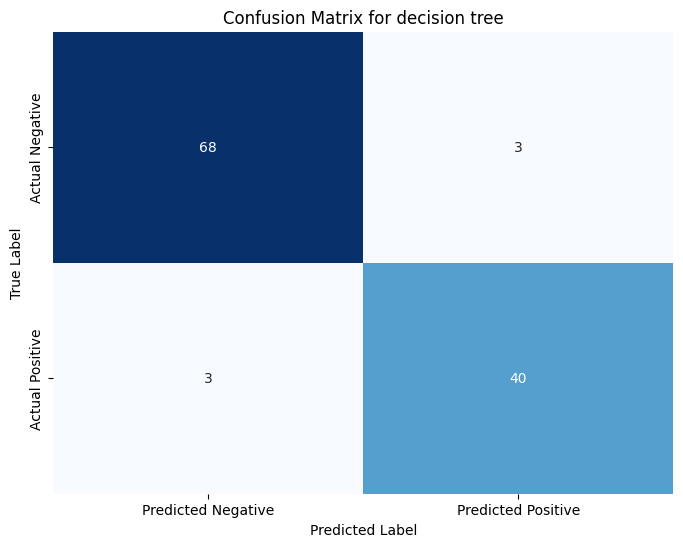

In [ ]:
#descion tree
#decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the data from CSV file
data = pd.read_csv('data.csv')

# Preprocessing: Encode the 'diagnosis' column to numeric values
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target
X = data.drop(columns=['id', 'diagnosis'])  # Features
y = data['diagnosis']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# If there are missing values, impute them in both X_train and X_test
if missing_values.any():
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)  # Use transform() for test data

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train,y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

#accuracy
nan_count = np.count_nonzero(np.isnan(X_test))
print(f"Number of NaN values in X_test: {nan_count}")
y_probs = decision_tree.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


cm_train_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix(Training Set):")
print(cm_train_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for decision tree')
plt.show()


In [ ]:
conf_matrix_knn = confusion_matrix(y_test,y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for lr')
plt.show()


NameError: name 'y_pred' is not defined

Accuracy: 0.9473684210526315
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Number of NaN values in X_test: 0


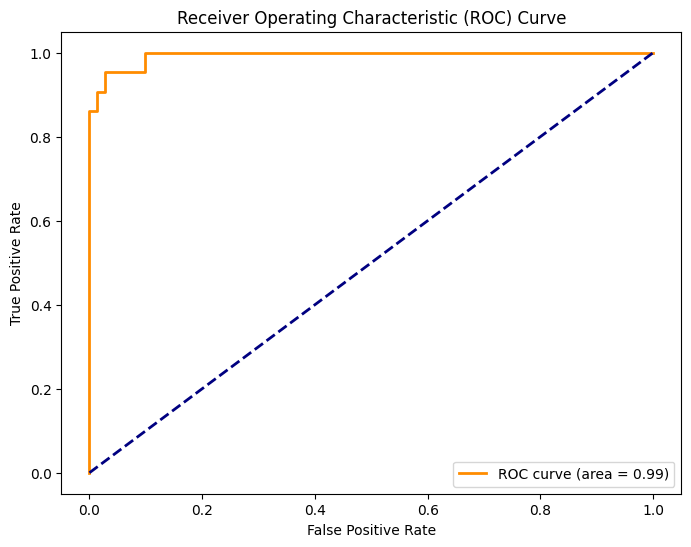

Confusion Matrix(Training Set):
[[71  0]
 [ 6 37]]


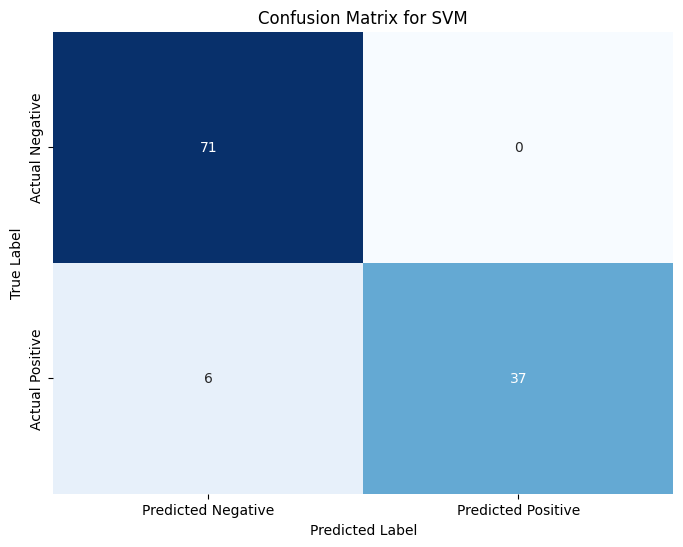

In [ ]:
#SVM
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Load the data from CSV file
data = pd.read_csv('data.csv')

# Preprocessing: Encode the 'diagnosis' column to numeric values
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target
X = data.drop(columns=['id', 'diagnosis'])  # Features
y = data['diagnosis']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
if X_train.isnull().sum().sum() > 0:
    # Impute missing values with the median
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')

    # Transform the training data
    X_train = imputer.fit_transform(X_train)

    # Transform the test data
    X_test = imputer.transform(X_test)

# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf', gamma='scale', random_state=42,probability=True)

# Train the model
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

#accuracy
nan_count = np.count_nonzero(np.isnan(X_test))
print(f"Number of NaN values in X_test: {nan_count}")
y_probs = svm.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


cm_train_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix(Training Set):")
print(cm_train_knn)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

Accuracy: 0.9736842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Number of NaN values in X_test: 114


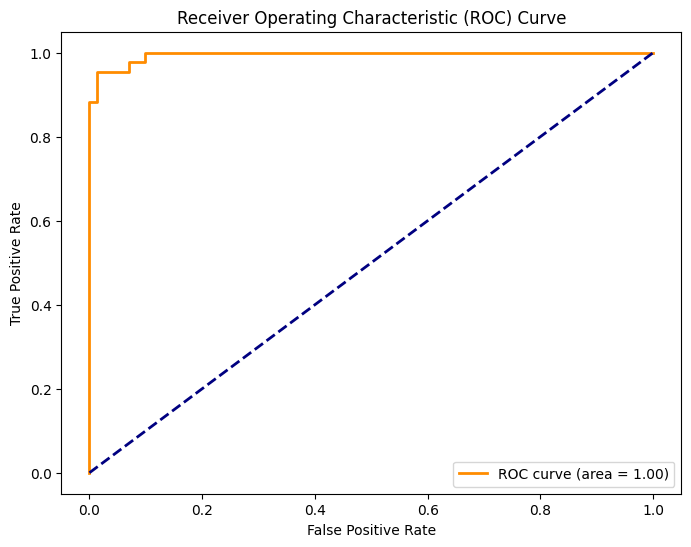

Confusion Matrix(Training Set):
[[70  1]
 [ 2 41]]


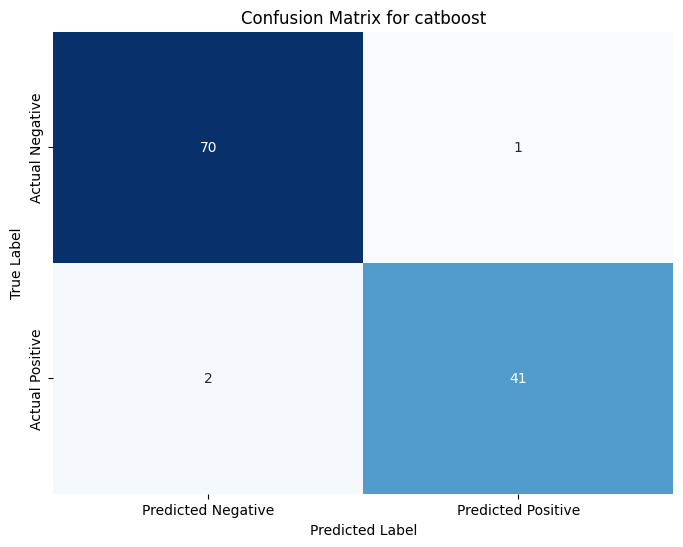

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data from CSV file
data = pd.read_csv('data.csv')

# Preprocessing: Encode the 'diagnosis' column to numeric values
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Separate features and target
X = data.drop(columns=['id', 'diagnosis'])  # Features
y = data['diagnosis']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=1000,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    random_state=42,
                                    verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = catboost_model.predict_proba(X_test)[:, 1]
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_str)

#accuracy
nan_count = np.count_nonzero(np.isnan(X_test))
print(f"Number of NaN values in X_test: {nan_count}")
y_probs = catboost_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


cm_train_knn = confusion_matrix(y_test, y_pred)
print("Confusion Matrix(Training Set):")
print(cm_train_knn)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for catboost')
plt.show()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
# Load data using pandas
from sklearn.impute import SimpleImputer
data = pd.read_csv("data.csv")

# Separate features and target variable
data = data.dropna()
features = data.drop("diagnosis", axis=1)  # Assuming "diagnosis" is the target
target = data["diagnosis"]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
pca = PCA(n_components=3)  # Choose the number of components
pca.fit(scaled_features)  # Train the PCA model on the data
reduced_features = pca.transform(scaled_features)
print(reduced_features)

ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required by StandardScaler.

In [ ]:
from sklearn.linear_model import LogisticRegression  # Assuming you used scikit-learn for base models

# Generate predictions from base models (assuming KNN outputs probabilities)
y_pred_train_lr = model_lr.predict_proba(X_train)[:, 1]
y_pred_train_knn = model_knn.predict_proba(X_train)[:, 1]
y_pred_test_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_test_knn = model_knn.predict_proba(X_test)[:, 1]

# Combine predictions as new features
X_train_stacked = np.concatenate((X_train, y_pred_train_lr.reshape(-1, 1), y_pred_train_knn.reshape(-1, 1)), axis=1)
X_test_stacked = np.concatenate((X_test, y_pred_test_lr.reshape(-1, 1), y_pred_test_knn.reshape(-1, 1)), axis=1)

# Train a meta-classifier (e.g., another logistic regression model)
meta_model = LogisticRegression(solver='liblinear')
meta_model.fit(X_train_stacked, y_train)

# Make predictions with the ensemble
y_pred_test_ensemble = meta_model.predict(X_test_stacked)

# Evaluate the ensemble accuracy on the test set
ensemble_test_accuracy = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test Accuracy (Stacking):", round(ensemble_test_accuracy, 2))


Ensemble Test Accuracy (Stacking): 0.96


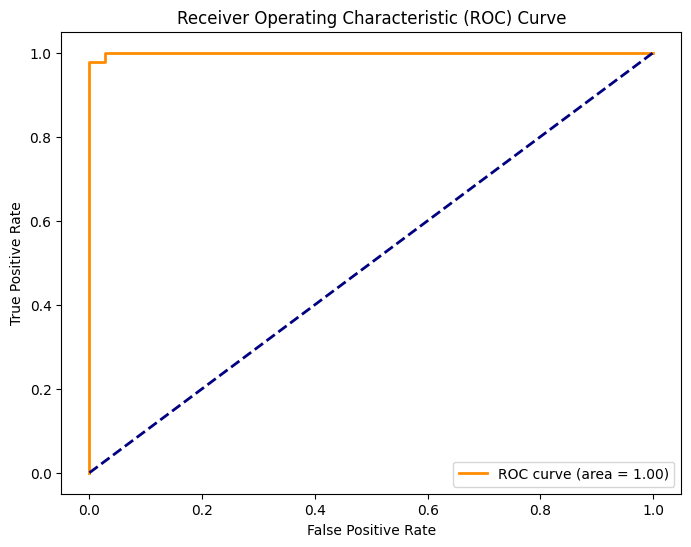

In [ ]:
num_original_features = 30
X_test_stacked_reduced = X_test_stacked[:, :num_original_features]
y_probs = model_lr.predict_proba(X_test_stacked_reduced)
fpr, tpr, thresholds = roc_curve(y_pred_test_ensemble, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression  # Assuming you used scikit-learn for base models
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

y_pred_train_lr = model_lr.predict_proba(X_train)[:, 1]
y_pred_train_dt = decision_tree.predict_proba(X_train)[:, 1]  # Assuming decision tree outputs probabilities

y_pred_test_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_test_dt = decision_tree.predict_proba(X_test)[:, 1]  # Assuming decision tree outputs probabilities

# Combine predictions and features
X_train_stacked = np.concatenate((X_train, y_pred_train_lr.reshape(-1, 1), y_pred_train_dt.reshape(-1, 1)), axis=1)
X_test_stacked = np.concatenate((X_test, y_pred_test_lr.reshape(-1, 1), y_pred_test_dt.reshape(-1, 1)), axis=1)

# Train a meta-classifier (e.g., another logistic regression model)
meta_model = LogisticRegression(solver='liblinear')
meta_model.fit(X_train_stacked, y_train)

# Make predictions with the ensemble
y_pred_test_ensemble = meta_model.predict(X_test_stacked)

# Evaluate ensemble accuracy
ensemble_test_accuracy = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test Accuracy (Stacking):", round(ensemble_test_accuracy, 2))


Ensemble Test Accuracy (Stacking): 0.95


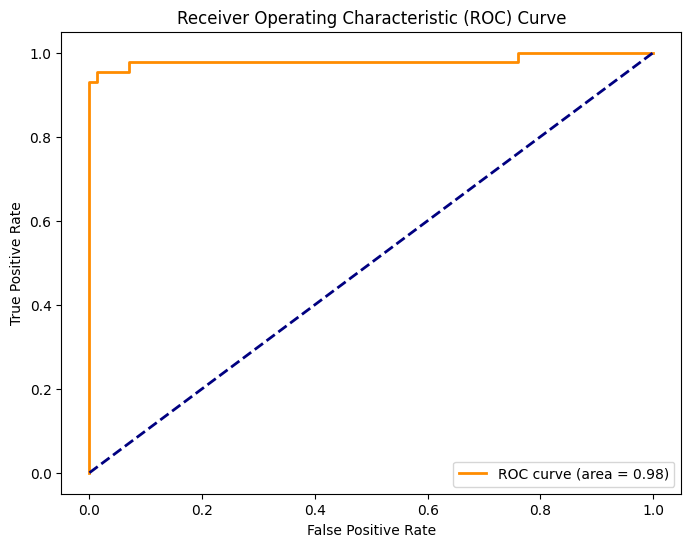

In [ ]:
num_original_features = 30
X_test_stacked_reduced = X_test_stacked[:, :num_original_features]
y_probs = model_lr.predict_proba(X_test_stacked_reduced)
fpr, tpr, thresholds = roc_curve(y_pred_test_ensemble, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
 # Assuming you used scikit-learn for base models
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma='scale', random_state=42,probability=True)
# Train the model
svm.fit(X_train, y_train)
# Generate predictions from base models
y_pred_train_lr = model_lr.predict_proba(X_train)[:, 1]
y_pred_train_dt = decision_tree.predict_proba(X_train)[:, 1]
y_pred_train_svm = svm.predict_proba(X_train)[:, 1]  # Assuming SVM outputs probabilities

y_pred_test_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_test_dt = decision_tree.predict_proba(X_test)[:, 1]
y_pred_test_svm = svm.predict_proba(X_test)[:, 1]  # Assuming SVM outputs probabilities

# Combine predictions and features
X_train_stacked = np.concatenate((X_train, y_pred_train_lr.reshape(-1, 1), y_pred_train_dt.reshape(-1, 1), y_pred_train_svm.reshape(-1, 1)), axis=1)
X_test_stacked = np.concatenate((X_test, y_pred_test_lr.reshape(-1, 1), y_pred_test_dt.reshape(-1, 1), y_pred_test_svm.reshape(-1, 1)), axis=1)

# Train a meta-classifier (e.g., another LogisticRegression model)
meta_model = LogisticRegression(solver='liblinear')
meta_model.fit(X_train_stacked, y_train)

# Make predictions with the ensemble
y_pred_test_ensemble = meta_model.predict(X_test_stacked)

# Evaluate ensemble accuracy
ensemble_test_accuracy = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test Accuracy (Stacking):", round(ensemble_test_accuracy, 2))


Ensemble Test Accuracy (Stacking): 0.96


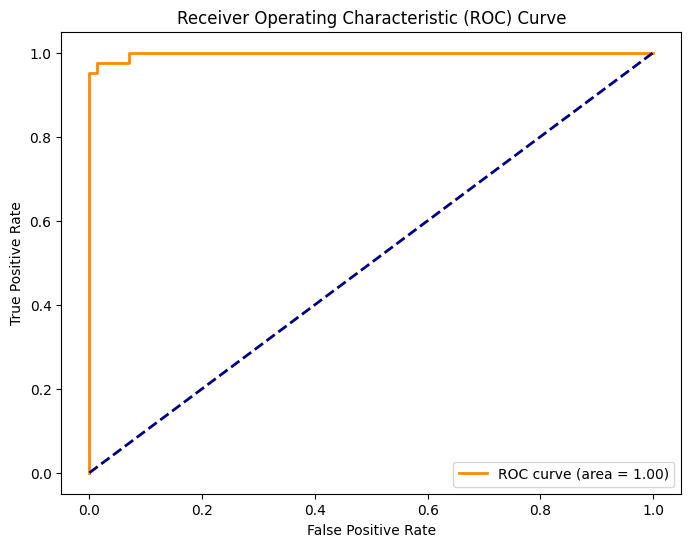

In [ ]:
num_original_features = 30
X_test_stacked_reduced = X_test_stacked[:, :num_original_features]
y_probs = model_lr.predict_proba(X_test_stacked_reduced)
fpr, tpr, thresholds = roc_curve(y_pred_test_ensemble, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
# Generate predictions from base models
catboost_model = CatBoostClassifier(iterations=1000,
                                    learning_rate=0.1,
                                    depth=6,
                                    loss_function='Logloss',
                                    random_state=42,
                                    verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)
y_pred_train_lr = model_lr.predict_proba(X_train)[:, 1]
y_pred_train_catboost = catboost_model.predict_proba(X_train)[:, 1]

y_pred_test_lr = model_lr.predict_proba(X_test)[:, 1]
y_pred_test_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Combine predictions and features
X_train_stacked = np.concatenate((X_train, y_pred_train_lr.reshape(-1, 1), y_pred_train_catboost.reshape(-1, 1)), axis=1)
X_test_stacked = np.concatenate((X_test, y_pred_test_lr.reshape(-1, 1), y_pred_test_catboost.reshape(-1, 1)), axis=1)

# Train a meta-classifier (e.g., another LogisticRegression model)
meta_model = LogisticRegression(solver='liblinear')
meta_model.fit(X_train_stacked, y_train)

# Make predictions with the ensemble
y_pred_test_ensemble = meta_model.predict(X_test_stacked)

# Evaluate ensemble accuracy
ensemble_test_accuracy = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test Accuracy (Stacking):", round(ensemble_test_accuracy, 2))


Ensemble Test Accuracy (Stacking): 0.96


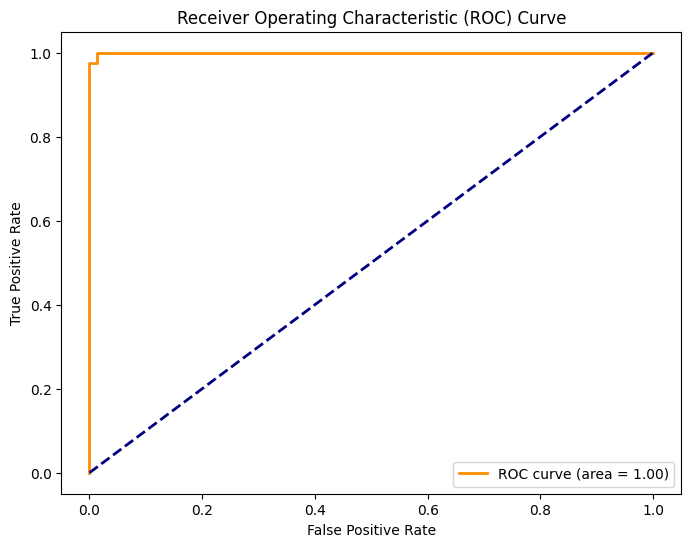

In [ ]:
num_original_features = 30
X_test_stacked_reduced = X_test_stacked[:, :num_original_features]
y_probs = model_lr.predict_proba(X_test_stacked_reduced)
fpr, tpr, thresholds = roc_curve(y_pred_test_ensemble, y_probs[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Sample data (replace with your actual data)
data = pd.DataFrame({
    "Age": [25, 32, 40, 18, 55],
    "Income": [50000, 70000, 85000, 25000, 100000],
    "Purchase_Frequency": [3, 1, 2, 5, 1],
    "Average_Order_Value": [100, 250, 500, 75, 1200]
})

# Determine optimal number of clusters (consider using elbow method)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data)

# Assign data points to clusters
data["Cluster"] = kmeans.labels_

# Analyze customer segments based on cluster information
print(data)


   Age  Income  Purchase_Frequency  Average_Order_Value  Cluster
0   25   50000                   3                  100        2
1   32   70000                   1                  250        2
2   40   85000                   2                  500        0
3   18   25000                   5                   75        1
4   55  100000                   1                 1200        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
